In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,cm
import random
import operator
from functools import reduce


In [3]:
def michalewicz(x):
    result = reduce(lambda acc, x: acc + np.sin(x) * np.power(np.sin((0 + 1) * np.power(x, 2) / np.pi), 2 * 10), x, 0.)
    return -1.0*result

In [5]:
def ackley(x):
    return -20*np.exp(-0.2*np.sqrt((x[0]**2+x[1]**2)/2)) - np.exp(0.5*(np.cos(2*np.pi*x[0]) + np.cos(2*np.pi*x[1]))) + 20 + np.exp(1)

In [6]:
def dejong(x):
    ans = 0
    for i in range(min(len(x),256)):
        ans+=np.power(x[i],4)
    return ans

In [7]:
def yang(x):
#     Yang N.2 function
    temp1 = 0
    temp2 = 0
    for i in range(min(len(x),16)):
        temp2+=np.sin(np.power(x[i],2))
        temp1+=np.absolute(x[i])
    ans =  temp1*np.exp(temp2*-1)
    return ans

In [8]:
def rosenbrock(x):
    ans=0.0
    for i in range(min(len(x),16)):
        ans+=(100.0*(x[i]-x[i]**2)**2 + (1-x[i])**2)
    return ans

In [9]:
def griewank(x):
    ans = 1.0
    inner_product = 1.0
    inner_sum = 0.0
    i=0
    while i < (len(x)):#change to while
        inner_sum += (x[i] ** 2)
        inner_product *= (np.cos(x[i] / np.sqrt(i + 1)))
        i+=1
    ans += (inner_sum * (1. / 4000.) - inner_product)
    return ans

In [11]:
def shubert(x):
        temp1 = 0
        temp2 = 0
        i=0
        while i < (5): #Change to while
            temp1 += ((i+1)*np.cos((i+1)+(i+2)*x[0]))
            temp2 += ((i+1)*np.cos((i+1)+(i+2)*x[1]))
            i+=1
        return temp1*temp2

In [12]:
def rastrigin(x):
    ans = 0.0
    i=0
    while i< (len(x)):#Change to while
        ans += (x[i] ** 2 - (10. * np.cos(2 * np.pi * x[i])))
        i+=1
    ans += 10. * len(x)
    return ans

In [13]:
def schwefel(x):
    ans=418.982887*len(x)
    for i in range(min(len(x),128)):
        ans-=x[i]*np.sin(np.sqrt(np.abs(x[i])))
    return ans

In [14]:
def easom(x):
    return -1.0*np.cos(x[0])*np.cos(x[1])*np.exp(-(x[0] - np.pi)**2 - (x[1] - np.pi)**2)

In [15]:
class Firefly():
    def __init__(self, alpha, beta, gamma, upper_boundary, lower_boundary, function_dimension):
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.__intensity = None
        self.lower_boundary = lower_boundary
        self.upper_boundary = upper_boundary
        self.__position = np.array([random.uniform(self.lower_boundary, self.upper_boundary) for x in range(function_dimension)])
    
    
    @property
    def intensity(self):
        return self.__intensity

        
    @property
    def position(self):
        return self.__position
    
    @position.setter
    def position(self, value):
        self.__position = value

    def move_towards(self, better_position):
        # euclidean distance
        distance = np.linalg.norm(self.__position - better_position)
        self.__position = self.__position + self.beta*np.exp(-self.gamma*(distance**2)) * (better_position-self.__position) +  self.alpha*(random.uniform(0, 1)-0.5)
        self.check_boundaries()

    def random_walk(self, area):
        self.__position = np.array([random.uniform(cord-area, cord+area) for x, cord in np.ndenumerate(self.__position)])
    def update_intensity(self, func):
        self.__intensity = -1*func(self.__position)
    def check_boundaries(self):
        for i, cord in np.ndenumerate(self.__position):
            if cord < self.lower_boundary:
                self.__position[i] = self.lower_boundary
            elif cord > self.upper_boundary:
                self.__position[i] = self.upper_boundary
            else:
                self.__position[i] = cord

In [17]:
class FireflyProblem():
    
    def __init__(self, function, firefly_number, upper_boundary=5.12, lower_boundary=-5.12, alpha=2, beta=2, gamma=0.97, iteration_number=50, interval=500, continuous=False):
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.function_dimension = 2
        self.upper_boundary = upper_boundary
        self.lower_boundary = lower_boundary
        self.iteration_number = iteration_number
        self.fireflies = [Firefly(self.alpha,self.beta,self.gamma,self.upper_boundary,self.lower_boundary, self.function_dimension) for x in range(firefly_number)]
        self.function = function
        self.interval = interval
        self.best = None
        self.continuous = continuous
        self.cost=[]
        i=0
        while i<(len(self.fireflies)): #Change to while
            (self.fireflies)[i].update_intensity(self.function)
            i+=1

    def run(self):
        y = np.linspace(self.lower_boundary, self.upper_boundary, 100)
        x = np.linspace(self.lower_boundary, self.upper_boundary, 100)
        X, Y = np.meshgrid(x, y)
        z = self.function([X, Y])        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        cs = ax.contourf(X, Y, z, cmap=cm.PuBu_r)  # pylint: disable=no-member
        fig.colorbar(cs)
        x_init = []
        y_init = []
        i=0
        while i<(len(self.fireflies)):#change to while
            x_init.append((self.fireflies)[i].position[0])
            y_init.append((self.fireflies)[i].position[1])
            i+=1
        particles, = ax.plot(x_init, y_init, 'ro', ms=6)
        rectangle = plt.Rectangle([self.lower_boundary, self.lower_boundary],self.upper_boundary-self.lower_boundary,self.upper_boundary-self.lower_boundary, ec='none', lw=2, fc='none')
        ax.add_patch(rectangle)
#         self.plot()

        def init():
            particles.set_data([], [])
            rectangle.set_edgecolor('none')
            return particles, rectangle

        def animate(i): #Generate animation and visualization
            x = []
            y = []
            ms = int(50. * fig.get_figwidth()/fig.dpi)
            rectangle.set_edgecolor('k')
            fig.canvas.set_window_title('Iteration %s/%s' % (i, self.iteration_number))
            if i ==0:
                print("reset the fireflies")
                self.best = None

            for idx, firefly in enumerate(self.fireflies):
                if i == 0:
                    firefly.__position = np.array([x_init[idx], y_init[idx]])
                    firefly.update_intensity(self.function)
                    fig.canvas.set_window_title('Initialization')
                x.append(firefly.position[0])
                y.append(firefly.position[1])
            self.step()
            particles.set_data(x, y)
            particles.set_markersize(ms)
            return particles, rectangle        
        graph = animation.FuncAnimation(fig, animate, frames=self.iteration_number+1, interval=self.interval, blit=True, init_func=init, repeat=self.continuous)
        plt.show()
        if (not self.best or self.fireflies[0].intensity > self.best):
            self.best = self.fireflies[0].intensity
        if(self.function==michalewicz):
            graph.save('firefly_michalewicz.gif')
        elif(self.function==easom):
            graph.save('firefly_easom.gif')            
        elif(self.function==shubert):
            graph.save('firefly_shubert.gif')            
        elif(self.function==ackley):
            graph.save('firefly_ackley.gif')
        elif(self.function==rosenbrock):
            graph.save('firefly_rosenbrock.gif')
        elif(self.function==dejong):
            graph.save('firefly_dejong.gif')
        elif(self.function==griewank):
            graph.save('firefly_griewank.gif')
        elif(self.function==yang):
            graph.save('firefly_yang.gif')            
        elif(self.function==rastrigin):
            graph.save('firefly_rastrigin.gif')
    def step(self):
        (self.fireflies).sort(key=operator.attrgetter('intensity'), reverse=True)
        for i in self.fireflies:
            for j in self.fireflies:
                if j.intensity > i.intensity:
                    i.move_towards(j.position)
                    i.update_intensity(self.function)
     
        if (not self.best or (self.fireflies[0].intensity > self.best) ):
            self.best = self.fireflies[0].intensity
        if(self.function==michalewicz):
            gmin = -1.8013
            self.cost.append(abs(self.best - abs(gmin))/abs(gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin)/abs(gmin))))             
        elif(self.function==easom):
            gmin = -1
            self.cost.append(abs(self.best - abs(gmin))/abs(gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin)/abs(gmin))))             
            
        elif(self.function==shubert):
            gmin = -186.7309
            self.cost.append(abs(self.best - abs(gmin))/abs(gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin)/abs(gmin))))             
            
        elif(self.function==ackley):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        elif(self.function==rosenbrock):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))

        elif(self.function==dejong):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        elif(self.function==griewank):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        elif(self.function==yang):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        elif(self.function==rastrigin):
            gmin = 0
            self.cost.append(abs(self.best - gmin))
            print("Overall best intensity: {}, Overall best Accuracy: {}".format(self.best,100*abs(1-abs(self.best - gmin))))
        (self.fireflies)[0].random_walk(0.1)
        (self.fireflies)[0].update_intensity(self.function)
    
    def plot(self):
        X_Axis=range(1,self.iteration_number+2)
        plt.plot(X_Axis,self.cost)
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost')
        plt.show()
        

In [19]:
def run_firefly_algorithm(optimizer,fireflies_number = 40,upper_boundary=5.12, lower_boundary=-5.12, alpha=2, beta=2, gamma=0.97, iteration_number=10, interval=500):
    out = FireflyProblem(optimizer, fireflies_number,upper_boundary, lower_boundary, alpha, beta, gamma, iteration_number, interval)
    out.run()
    out.plot()

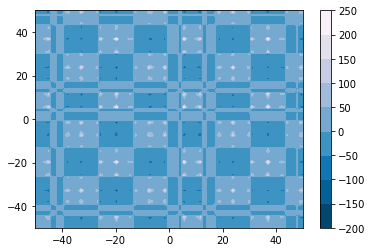

MovieWriter ffmpeg unavailable; using Pillow instead.


reset the fireflies
Overall best intensity: 62.26761919866046, Overall best Accuracy: 33.346178483936214
Overall best intensity: 90.85743737530568, Overall best Accuracy: 48.656883984014264
Overall best intensity: 122.95565649064763, Overall best Accuracy: 65.84644345989207
Overall best intensity: 135.9764127780885, Overall best Accuracy: 72.81944915281218
Overall best intensity: 172.62472720352528, Overall best Accuracy: 92.44572119746934
Overall best intensity: 172.62472720352528, Overall best Accuracy: 92.44572119746934
Overall best intensity: 172.62472720352528, Overall best Accuracy: 92.44572119746934
Overall best intensity: 172.62472720352528, Overall best Accuracy: 92.44572119746934
Overall best intensity: 172.62472720352528, Overall best Accuracy: 92.44572119746934
Overall best intensity: 179.60354583047072, Overall best Accuracy: 96.18308797872808
Overall best intensity: 179.60354583047072, Overall best Accuracy: 96.18308797872808
Overall best intensity: 179.60354583047072, Ov

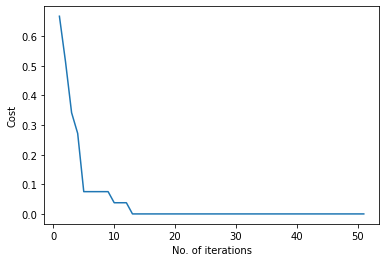

In [20]:
run_firefly_algorithm(shubert,40,50,-50,2, 2,0.97, 50,100)

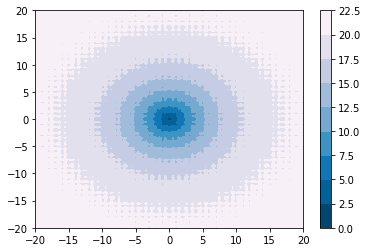

MovieWriter ffmpeg unavailable; using Pillow instead.


reset the fireflies
Overall best intensity: -4.91686742149756, Overall best Accuracy: 391.686742149756
Overall best intensity: -4.684608981512898, Overall best Accuracy: 368.4608981512898
Overall best intensity: -4.4358668494666915, Overall best Accuracy: 343.58668494666915
Overall best intensity: -4.065513112456689, Overall best Accuracy: 306.55131124566884
Overall best intensity: -3.9617731997324417, Overall best Accuracy: 296.17731997324415
Overall best intensity: -3.9617731997324417, Overall best Accuracy: 296.17731997324415
Overall best intensity: -3.642946142764576, Overall best Accuracy: 264.2946142764576
Overall best intensity: -3.640026743831737, Overall best Accuracy: 264.0026743831737
Overall best intensity: -3.640026743831737, Overall best Accuracy: 264.0026743831737
Overall best intensity: -3.467858599897714, Overall best Accuracy: 246.78585998977138
Overall best intensity: -3.467858599897714, Overall best Accuracy: 246.78585998977138
Overall best intensity: -2.98392524303

Overall best intensity: -0.01951740580718253, Overall best Accuracy: 98.04825941928175
Overall best intensity: -0.01951740580718253, Overall best Accuracy: 98.04825941928175
Overall best intensity: -0.01951740580718253, Overall best Accuracy: 98.04825941928175
Overall best intensity: -0.01951740580718253, Overall best Accuracy: 98.04825941928175
Overall best intensity: -0.01951740580718253, Overall best Accuracy: 98.04825941928175
Overall best intensity: -0.01951740580718253, Overall best Accuracy: 98.04825941928175
Overall best intensity: -0.01951740580718253, Overall best Accuracy: 98.04825941928175
Overall best intensity: -0.01951740580718253, Overall best Accuracy: 98.04825941928175
Overall best intensity: -0.01951740580718253, Overall best Accuracy: 98.04825941928175
Overall best intensity: -0.01951740580718253, Overall best Accuracy: 98.04825941928175
Overall best intensity: -0.01951740580718253, Overall best Accuracy: 98.04825941928175
Overall best intensity: -0.0195174058071825

Overall best intensity: -0.012203184028749536, Overall best Accuracy: 98.77968159712505
Overall best intensity: -0.012203184028749536, Overall best Accuracy: 98.77968159712505
Overall best intensity: -0.012203184028749536, Overall best Accuracy: 98.77968159712505
Overall best intensity: -0.012203184028749536, Overall best Accuracy: 98.77968159712505
Overall best intensity: -0.012203184028749536, Overall best Accuracy: 98.77968159712505
Overall best intensity: -0.012203184028749536, Overall best Accuracy: 98.77968159712505
Overall best intensity: -0.012203184028749536, Overall best Accuracy: 98.77968159712505
Overall best intensity: -0.012203184028749536, Overall best Accuracy: 98.77968159712505
Overall best intensity: -0.012203184028749536, Overall best Accuracy: 98.77968159712505
Overall best intensity: -0.012203184028749536, Overall best Accuracy: 98.77968159712505
Overall best intensity: -0.012203184028749536, Overall best Accuracy: 98.77968159712505


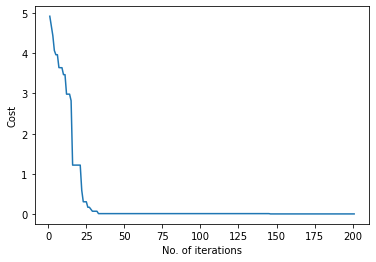

In [21]:
run_firefly_algorithm(ackley,40,20,-20,1,5,0.5,200,50)

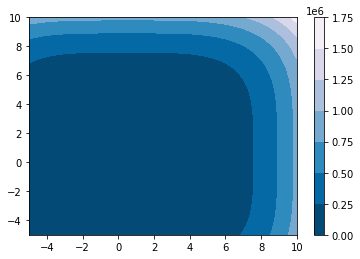

MovieWriter ffmpeg unavailable; using Pillow instead.


reset the fireflies
Overall best intensity: -1553.3222431640293, Overall best Accuracy: 155232.22431640292
Overall best intensity: -1.8866668588124944, Overall best Accuracy: 88.66668588124944
Overall best intensity: -1.6429929257817248, Overall best Accuracy: 64.29929257817248
Overall best intensity: -1.6429929257817248, Overall best Accuracy: 64.29929257817248
Overall best intensity: -1.0300301373662948, Overall best Accuracy: 3.0030137366294785
Overall best intensity: -0.02311801425580598, Overall best Accuracy: 97.6881985744194
Overall best intensity: -0.02311801425580598, Overall best Accuracy: 97.6881985744194
Overall best intensity: -0.02311801425580598, Overall best Accuracy: 97.6881985744194
Overall best intensity: -0.0033995408932307814, Overall best Accuracy: 99.66004591067691
Overall best intensity: -0.0033995408932307814, Overall best Accuracy: 99.66004591067691
Overall best intensity: -0.0033995408932307814, Overall best Accuracy: 99.66004591067691
Overall best intensity:

Overall best intensity: -0.0024370578166524994, Overall best Accuracy: 99.75629421833474
Overall best intensity: -0.0024370578166524994, Overall best Accuracy: 99.75629421833474
Overall best intensity: -0.0024370578166524994, Overall best Accuracy: 99.75629421833474
Overall best intensity: -0.0024370578166524994, Overall best Accuracy: 99.75629421833474
Overall best intensity: -0.0024370578166524994, Overall best Accuracy: 99.75629421833474
Overall best intensity: -0.0024370578166524994, Overall best Accuracy: 99.75629421833474
Overall best intensity: -0.0024370578166524994, Overall best Accuracy: 99.75629421833474
Overall best intensity: -0.0024370578166524994, Overall best Accuracy: 99.75629421833474
Overall best intensity: -0.0024370578166524994, Overall best Accuracy: 99.75629421833474
Overall best intensity: -0.0024370578166524994, Overall best Accuracy: 99.75629421833474
Overall best intensity: -0.0024370578166524994, Overall best Accuracy: 99.75629421833474
Overall best intensit

Overall best intensity: -0.002292703890296169, Overall best Accuracy: 99.77072961097039
Overall best intensity: -0.002292703890296169, Overall best Accuracy: 99.77072961097039
Overall best intensity: -0.002292703890296169, Overall best Accuracy: 99.77072961097039
Overall best intensity: -0.002292703890296169, Overall best Accuracy: 99.77072961097039
Overall best intensity: -0.002292703890296169, Overall best Accuracy: 99.77072961097039
Overall best intensity: -0.002292703890296169, Overall best Accuracy: 99.77072961097039
Overall best intensity: -0.002292703890296169, Overall best Accuracy: 99.77072961097039
Overall best intensity: -0.002292703890296169, Overall best Accuracy: 99.77072961097039
Overall best intensity: -0.002292703890296169, Overall best Accuracy: 99.77072961097039
Overall best intensity: -0.002292703890296169, Overall best Accuracy: 99.77072961097039
Overall best intensity: -0.002292703890296169, Overall best Accuracy: 99.77072961097039
Overall best intensity: -0.00229

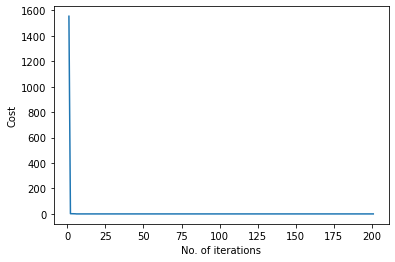

In [22]:
run_firefly_algorithm(rosenbrock,40,10,-5,1,5,0.5,200,50)

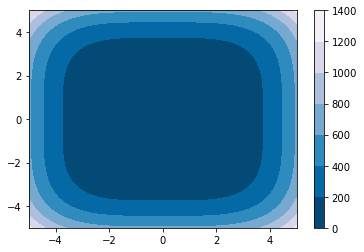

MovieWriter ffmpeg unavailable; using Pillow instead.


reset the fireflies
Overall best intensity: -0.0035723355688811543, Overall best Accuracy: 99.64276644311188
Overall best intensity: -1.0954447302227674e-05, Overall best Accuracy: 99.99890455526977
Overall best intensity: -7.896480297080375e-06, Overall best Accuracy: 99.99921035197029
Overall best intensity: -1.4055758261136861e-06, Overall best Accuracy: 99.99985944241739
Overall best intensity: -1.2570978517534307e-07, Overall best Accuracy: 99.99998742902149
Overall best intensity: -1.2570978517534307e-07, Overall best Accuracy: 99.99998742902149
Overall best intensity: -5.017320527502601e-08, Overall best Accuracy: 99.99999498267947
Overall best intensity: -5.017320527502601e-08, Overall best Accuracy: 99.99999498267947
Overall best intensity: -5.017320527502601e-08, Overall best Accuracy: 99.99999498267947
Overall best intensity: -5.017320527502601e-08, Overall best Accuracy: 99.99999498267947
Overall best intensity: -5.017320527502601e-08, Overall best Accuracy: 99.999994982679

Overall best intensity: -7.69378085717151e-10, Overall best Accuracy: 99.99999992306219
Overall best intensity: -7.69378085717151e-10, Overall best Accuracy: 99.99999992306219
Overall best intensity: -7.69378085717151e-10, Overall best Accuracy: 99.99999992306219
Overall best intensity: -7.69378085717151e-10, Overall best Accuracy: 99.99999992306219
Overall best intensity: -7.69378085717151e-10, Overall best Accuracy: 99.99999992306219
Overall best intensity: -7.69378085717151e-10, Overall best Accuracy: 99.99999992306219
Overall best intensity: -7.69378085717151e-10, Overall best Accuracy: 99.99999992306219
Overall best intensity: -7.69378085717151e-10, Overall best Accuracy: 99.99999992306219
Overall best intensity: -7.69378085717151e-10, Overall best Accuracy: 99.99999992306219
Overall best intensity: -7.69378085717151e-10, Overall best Accuracy: 99.99999992306219
Overall best intensity: -3.44044334426121e-11, Overall best Accuracy: 99.99999999655955
Overall best intensity: -3.44044

Overall best intensity: -3.44044334426121e-11, Overall best Accuracy: 99.99999999655955
Overall best intensity: -3.44044334426121e-11, Overall best Accuracy: 99.99999999655955
Overall best intensity: -3.44044334426121e-11, Overall best Accuracy: 99.99999999655955
Overall best intensity: -3.44044334426121e-11, Overall best Accuracy: 99.99999999655955
Overall best intensity: -3.44044334426121e-11, Overall best Accuracy: 99.99999999655955
Overall best intensity: -3.44044334426121e-11, Overall best Accuracy: 99.99999999655955
Overall best intensity: -3.44044334426121e-11, Overall best Accuracy: 99.99999999655955
Overall best intensity: -3.44044334426121e-11, Overall best Accuracy: 99.99999999655955
Overall best intensity: -3.44044334426121e-11, Overall best Accuracy: 99.99999999655955
Overall best intensity: -3.44044334426121e-11, Overall best Accuracy: 99.99999999655955
Overall best intensity: -3.44044334426121e-11, Overall best Accuracy: 99.99999999655955
Overall best intensity: -3.44044

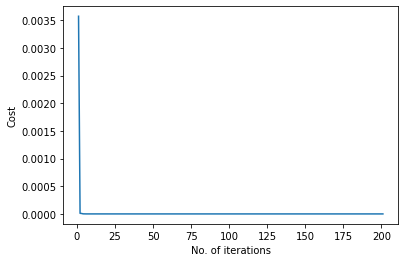

In [30]:
run_firefly_algorithm(dejong,40,5,-5,1,5,0.5,200,50)

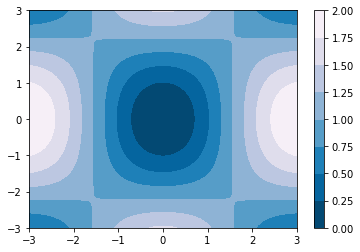

MovieWriter ffmpeg unavailable; using Pillow instead.


reset the fireflies
Overall best intensity: -0.01931167253001609, Overall best Accuracy: 98.0688327469984
Overall best intensity: -0.0010635327861057142, Overall best Accuracy: 99.89364672138943
Overall best intensity: -0.00028285572548336635, Overall best Accuracy: 99.97171442745166
Overall best intensity: -0.00028285572548336635, Overall best Accuracy: 99.97171442745166
Overall best intensity: -0.0002693710888552747, Overall best Accuracy: 99.97306289111447
Overall best intensity: -0.0002693710888552747, Overall best Accuracy: 99.97306289111447
Overall best intensity: -0.0002693710888552747, Overall best Accuracy: 99.97306289111447
Overall best intensity: -6.463861817307404e-05, Overall best Accuracy: 99.99353613818269
Overall best intensity: -6.463861817307404e-05, Overall best Accuracy: 99.99353613818269
Overall best intensity: -6.463861817307404e-05, Overall best Accuracy: 99.99353613818269
Overall best intensity: -6.463861817307404e-05, Overall best Accuracy: 99.99353613818269
Ov

Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensit

Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensity: -2.491387728564831e-06, Overall best Accuracy: 99.99975086122714
Overall best intensit

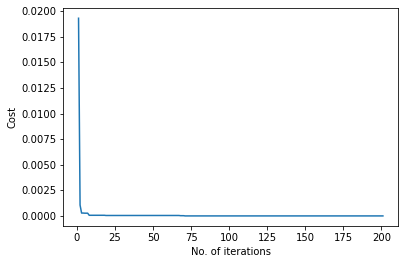

In [24]:
run_firefly_algorithm(griewank,40,3,-3,1,5,0.5,200,50)

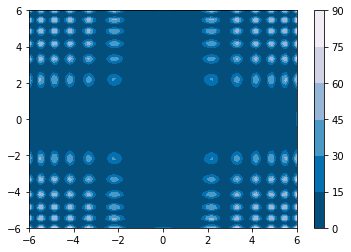

MovieWriter ffmpeg unavailable; using Pillow instead.


reset the fireflies
Overall best intensity: -0.48290057098118533, Overall best Accuracy: 51.70994290188147
Overall best intensity: -0.3609224470162689, Overall best Accuracy: 63.90775529837312
Overall best intensity: -0.332300374161153, Overall best Accuracy: 66.7699625838847
Overall best intensity: -0.15446357802704486, Overall best Accuracy: 84.5536421972955
Overall best intensity: -0.02141485896507242, Overall best Accuracy: 97.85851410349275
Overall best intensity: -0.02141485896507242, Overall best Accuracy: 97.85851410349275
Overall best intensity: -0.02141485896507242, Overall best Accuracy: 97.85851410349275
Overall best intensity: -0.02141485896507242, Overall best Accuracy: 97.85851410349275
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -

Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.00296

Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639
Overall best intensity: -0.002969191057436062, Overall best Accuracy: 99.70308089425639


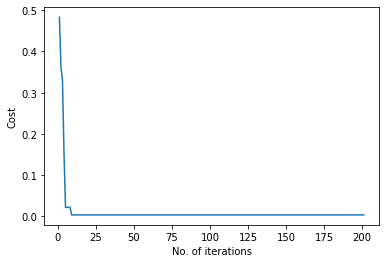

In [25]:
run_firefly_algorithm(yang,40,6,-6,1,5,0.5,200,100)

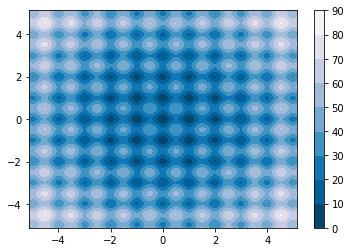

MovieWriter ffmpeg unavailable; using Pillow instead.


reset the fireflies
Overall best intensity: -6.203859195079618, Overall best Accuracy: 520.3859195079618
Overall best intensity: -4.017754855343465, Overall best Accuracy: 301.77548553434656
Overall best intensity: -2.0890341003851063, Overall best Accuracy: 108.90341003851063
Overall best intensity: -1.2156904260558967, Overall best Accuracy: 21.569042605589672
Overall best intensity: -1.0520699282153458, Overall best Accuracy: 5.206992821534584
Overall best intensity: -1.0520699282153458, Overall best Accuracy: 5.206992821534584
Overall best intensity: -1.0520699282153458, Overall best Accuracy: 5.206992821534584
Overall best intensity: -0.3842074201660708, Overall best Accuracy: 61.57925798339292
Overall best intensity: -0.3842074201660708, Overall best Accuracy: 61.57925798339292
Overall best intensity: -0.3842074201660708, Overall best Accuracy: 61.57925798339292
Overall best intensity: -0.3842074201660708, Overall best Accuracy: 61.57925798339292
Overall best intensity: -0.245500

Overall best intensity: -0.015809679518959285, Overall best Accuracy: 98.41903204810407
Overall best intensity: -0.015809679518959285, Overall best Accuracy: 98.41903204810407
Overall best intensity: -0.015809679518959285, Overall best Accuracy: 98.41903204810407
Overall best intensity: -0.015809679518959285, Overall best Accuracy: 98.41903204810407
Overall best intensity: -0.015809679518959285, Overall best Accuracy: 98.41903204810407
Overall best intensity: -0.015809679518959285, Overall best Accuracy: 98.41903204810407
Overall best intensity: -0.015809679518959285, Overall best Accuracy: 98.41903204810407
Overall best intensity: -0.015809679518959285, Overall best Accuracy: 98.41903204810407
Overall best intensity: -0.015809679518959285, Overall best Accuracy: 98.41903204810407
Overall best intensity: -0.008105914486737475, Overall best Accuracy: 99.18940855132625
Overall best intensity: -0.008105914486737475, Overall best Accuracy: 99.18940855132625
Overall best intensity: -0.00810

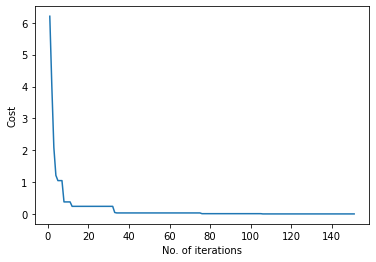

In [26]:
run_firefly_algorithm(rastrigin,40,5.12,-5.12,1,5,0.5,150,100)

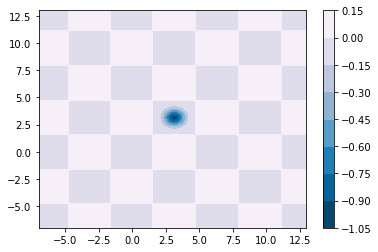

MovieWriter ffmpeg unavailable; using Pillow instead.


reset the fireflies
Overall best intensity: 0.11532763322500279, Overall best Accuracy: 11.532763322500283
Overall best intensity: 0.839795883701819, Overall best Accuracy: 83.97958837018189
Overall best intensity: 0.839795883701819, Overall best Accuracy: 83.97958837018189
Overall best intensity: 0.9807258392275359, Overall best Accuracy: 98.0725839227536
Overall best intensity: 0.9807258392275359, Overall best Accuracy: 98.0725839227536
Overall best intensity: 0.9807258392275359, Overall best Accuracy: 98.0725839227536
Overall best intensity: 0.9986636952213623, Overall best Accuracy: 99.86636952213624
Overall best intensity: 0.9986636952213623, Overall best Accuracy: 99.86636952213624
Overall best intensity: 0.9986636952213623, Overall best Accuracy: 99.86636952213624
Overall best intensity: 0.9986636952213623, Overall best Accuracy: 99.86636952213624
Overall best intensity: 0.9986636952213623, Overall best Accuracy: 99.86636952213624
Overall best intensity: 0.9986636952213623, Over

Overall best intensity: 0.9999775924949268, Overall best Accuracy: 99.99775924949267
Overall best intensity: 0.9999775924949268, Overall best Accuracy: 99.99775924949267


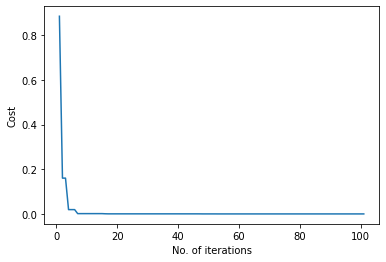

In [27]:
run_firefly_algorithm(easom,40,13,-7,1,5,0.5,100,100)

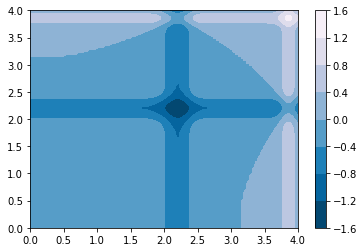

MovieWriter ffmpeg unavailable; using Pillow instead.


reset the fireflies
Overall best intensity: 0.7857877463811508, Overall best Accuracy: 43.6233690324294
Overall best intensity: 1.588540705731701, Overall best Accuracy: 88.18856968476663
Overall best intensity: 1.588540705731701, Overall best Accuracy: 88.18856968476663
Overall best intensity: 1.599335295014248, Overall best Accuracy: 88.78783628569633
Overall best intensity: 1.6022703459410037, Overall best Accuracy: 88.95077699111773
Overall best intensity: 1.6022703459410037, Overall best Accuracy: 88.95077699111773
Overall best intensity: 1.6022703459410037, Overall best Accuracy: 88.95077699111773
Overall best intensity: 1.6022703459410037, Overall best Accuracy: 88.95077699111773
Overall best intensity: 1.6022703459410037, Overall best Accuracy: 88.95077699111773
Overall best intensity: 1.6022703459410037, Overall best Accuracy: 88.95077699111773
Overall best intensity: 1.6022703459410037, Overall best Accuracy: 88.95077699111773
Overall best intensity: 1.6022703459410037, Overa

Overall best intensity: 1.6025944504027667, Overall best Accuracy: 88.9687697997428
Overall best intensity: 1.6025944504027667, Overall best Accuracy: 88.9687697997428
Overall best intensity: 1.6025944504027667, Overall best Accuracy: 88.9687697997428
Overall best intensity: 1.6025944504027667, Overall best Accuracy: 88.9687697997428
Overall best intensity: 1.6025944504027667, Overall best Accuracy: 88.9687697997428
Overall best intensity: 1.6025944504027667, Overall best Accuracy: 88.9687697997428
Overall best intensity: 1.6025944504027667, Overall best Accuracy: 88.9687697997428
Overall best intensity: 1.6025944504027667, Overall best Accuracy: 88.9687697997428
Overall best intensity: 1.6025944504027667, Overall best Accuracy: 88.9687697997428
Overall best intensity: 1.6025944504027667, Overall best Accuracy: 88.9687697997428
Overall best intensity: 1.6025944504027667, Overall best Accuracy: 88.9687697997428
Overall best intensity: 1.6025944504027667, Overall best Accuracy: 88.968769

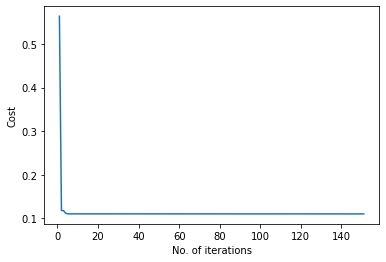

In [28]:
run_firefly_algorithm(michalewicz,40,4,0,1,5,0.5,150,100)